# Imports

In [1]:
import pickle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import IsolationForest

# Load Synthetic Time Series

In [4]:
with open('vm_series_0.pickle', 'rb') as handle:
   vm_series = pickle.load(handle)

# Define Anomalies

In [5]:
def plot_anomaly_marked_series(marked_vm_series):
    fig, ax = plt.subplots(5, 1, figsize=(15, 20))
    for i, (c, l) in enumerate(zip(
            ['brown', 'pink', 'gray', 'blue', 'violet'],
            ['brown', 'pink', 'white', 'blue', 'violet'])):
        t, r, o = marked_vm_series[l]
        ax[i].plot(t, r, c=c, linewidth=1)
        ax[i].scatter(t[o], r[o], c='black', marker='*', zorder=1)
        ax[i].set_title(l)

## Large rate difference

Centre rate diff isolation forest section is selected as choice for research

### Simple rate diff

In [ ]:
def RateDifference_anomalies(series, percentile_threshold=2):
    t, r = series
    threhsold = np.percentile(np.abs(r[1:]-r[:-1]), 100-percentile_threshold)
    anomalies = np.hstack(([False], (np.abs(r[1:]-r[:-1]) > threhsold)))
    return anomalies

In [ ]:
vm_rate_diff = {
    colour: (*vm_series[colour], RateDifference_anomalies(vm_series[colour], percentile_threshold=2))
    for colour in ['brown', 'pink', 'white', 'blue', 'violet']}

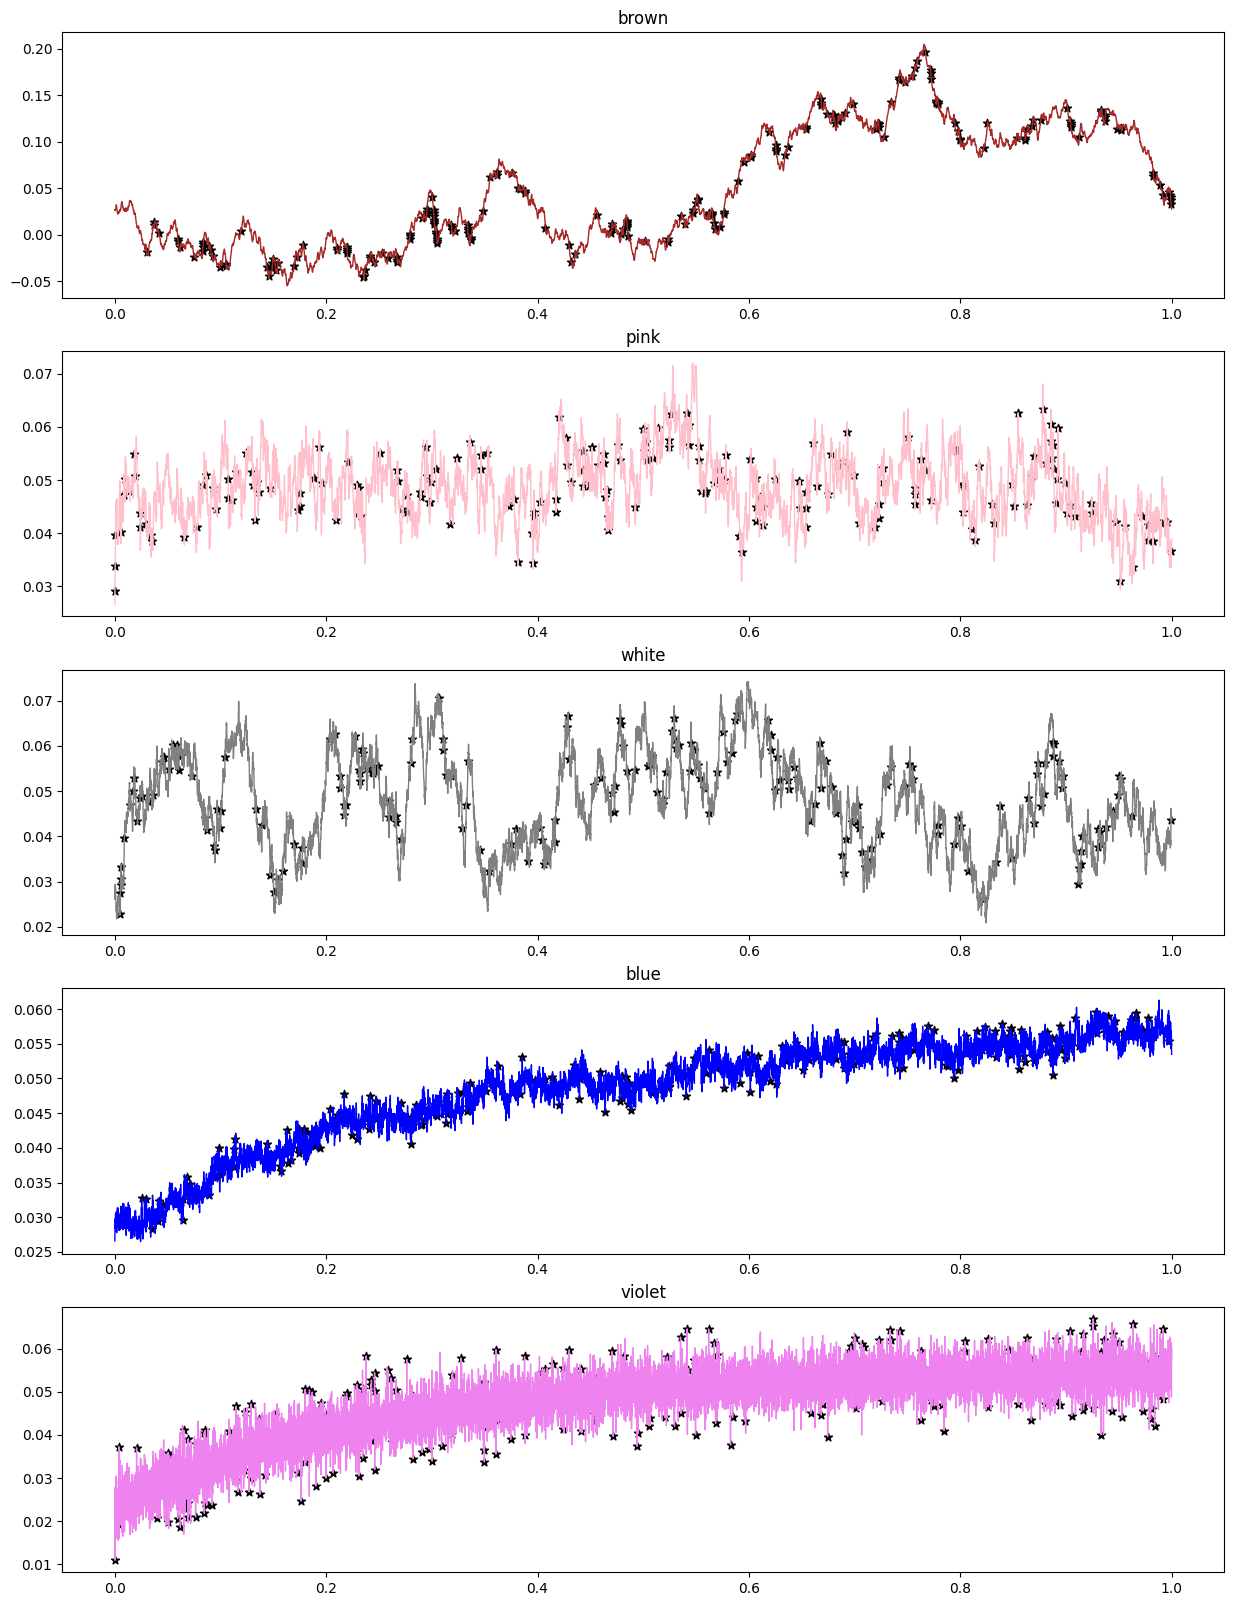

In [ ]:
plot_anomaly_marked_series(vm_rate_diff)
plt.show()

### Square sum rate diff

In [ ]:
def SquaredCentreRateDifferenceSum_anomalies(series, percentile_threshold=2):
    t, r = series
    drl = r[1:-1] - r[:-2]
    drr = r[1:-1] - r[2:]
    threhsold = np.percentile(drl**2 + drr*2, 100-percentile_threshold)
    anomalies = np.hstack(([False], (drl**2 + drr*2 > threhsold), [False]))
    return anomalies

In [ ]:
vm_sq_c_rate_diff_sum = {
    colour: (*vm_series[colour], SquaredCentreRateDifferenceSum_anomalies(vm_series[colour], percentile_threshold=2))
    for colour in ['brown', 'pink', 'white', 'blue', 'violet']}

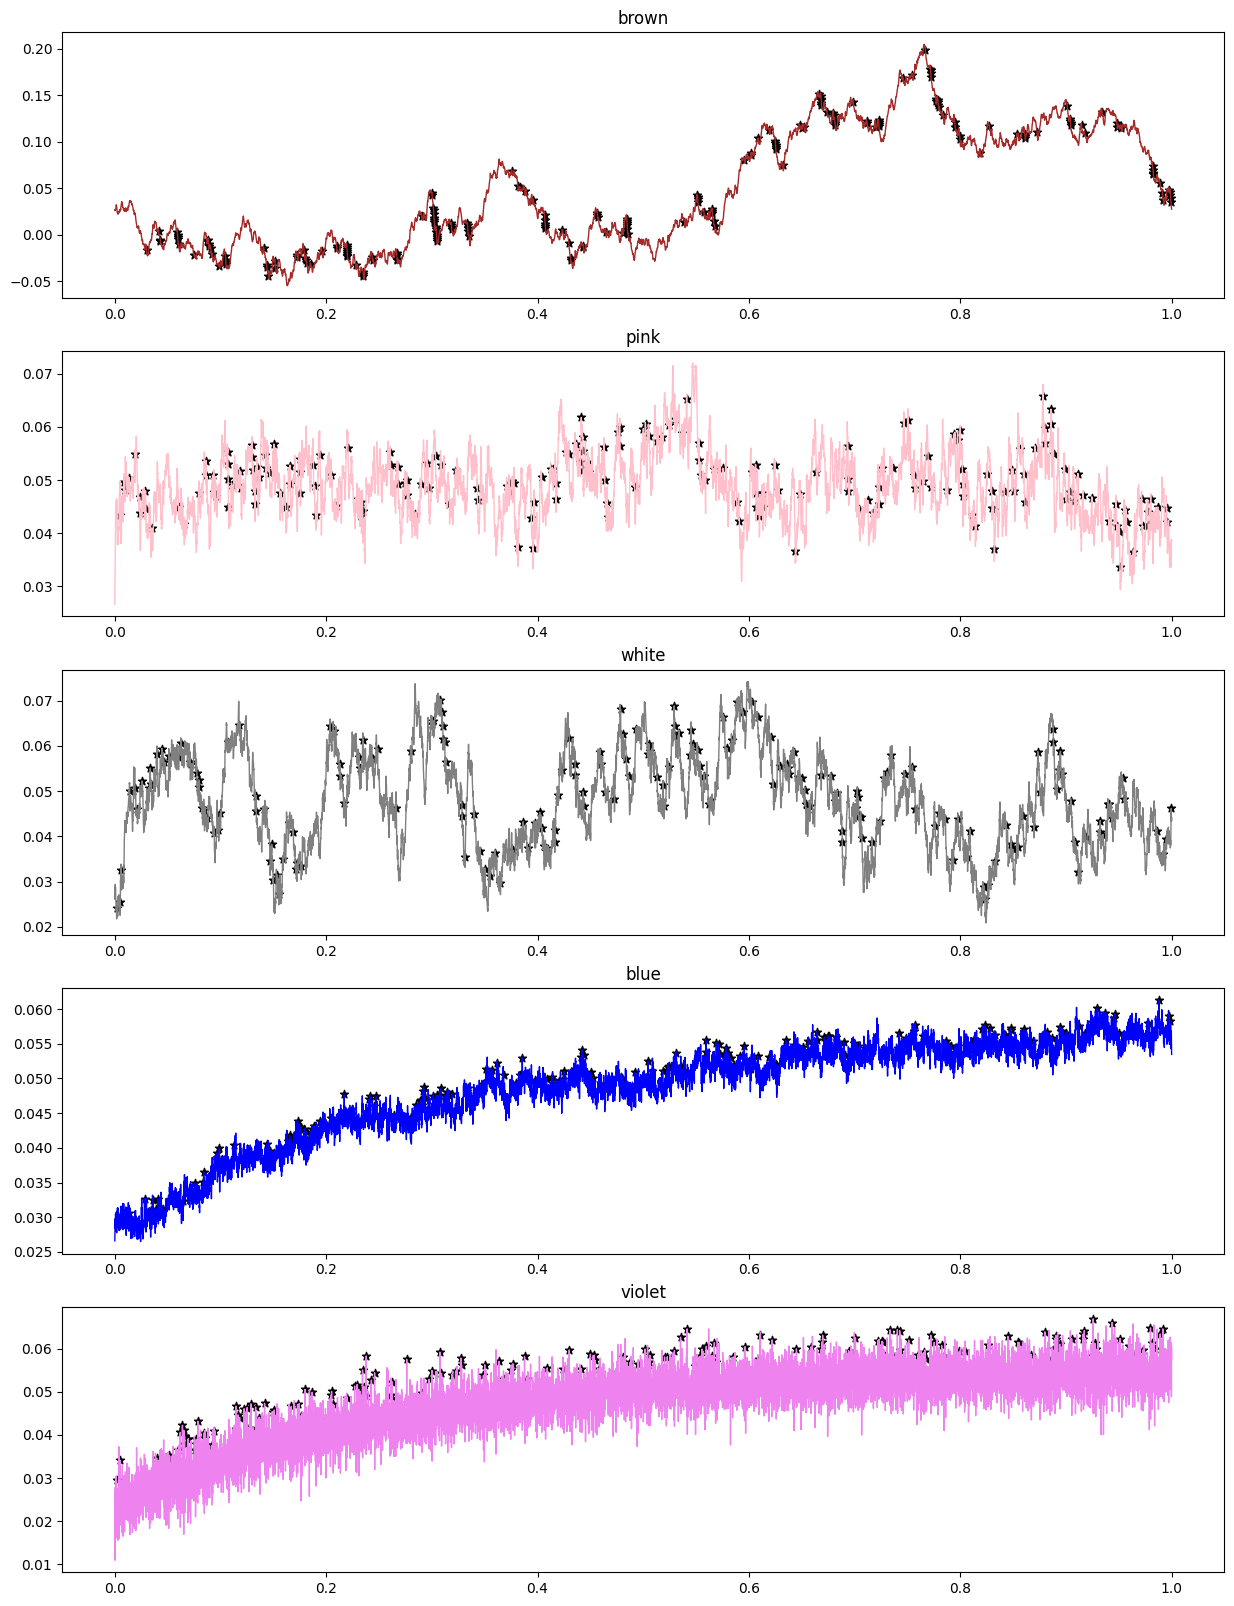

In [ ]:
plot_anomaly_marked_series(vm_sq_c_rate_diff_sum)
plt.show()

### Center rate diff isolation forest


In [6]:
def CenterRateDifferenceIsolationForest_anomalies(series, contamination=0.0001, percentile_threshold=2):
    t, r = series
    drl = r[1:-1] - r[:-2]
    drr = r[1:-1] - r[2:]
    X = np.hstack((drl.reshape(-1, 1), drr.reshape(-1, 1)))
    clf = IsolationForest(contamination=contamination, random_state=42)
    clf.fit(X)
    anomaly_scores = clf.decision_function(X)
    threshold_score = np.percentile(anomaly_scores, percentile_threshold)
    anomalies = np.hstack(([False], (anomaly_scores < threshold_score), [False]))
    return anomalies, np.hstack(([None], anomaly_scores, [None])), threshold_score

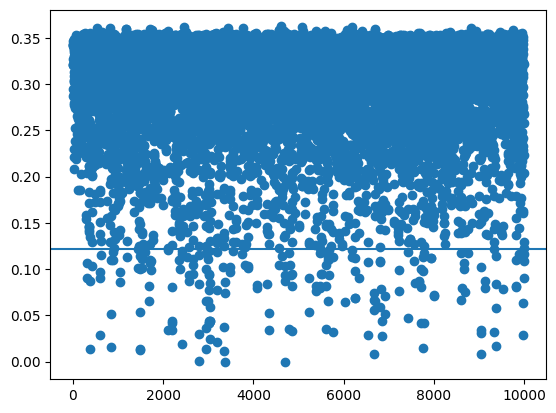

In [7]:
ascore, t = CenterRateDifferenceIsolationForest_anomalies(vm_series['brown'], percentile_threshold=2)[1:]
plt.scatter(np.arange(len(ascore)), ascore)
plt.axhline(t)
plt.show()

In [12]:
vm_c_rate_diff_if = {
    colour: (*vm_series[colour], CenterRateDifferenceIsolationForest_anomalies(vm_series[colour], percentile_threshold=2)[:-2])
    for colour in ['brown', 'pink', 'white', 'blue', 'violet']}

In [13]:
# with open('vm_c_rate_diff_if.pickle', 'rb') as handle:
   # vm_c_rate_diff_if = pickle.load(handle)

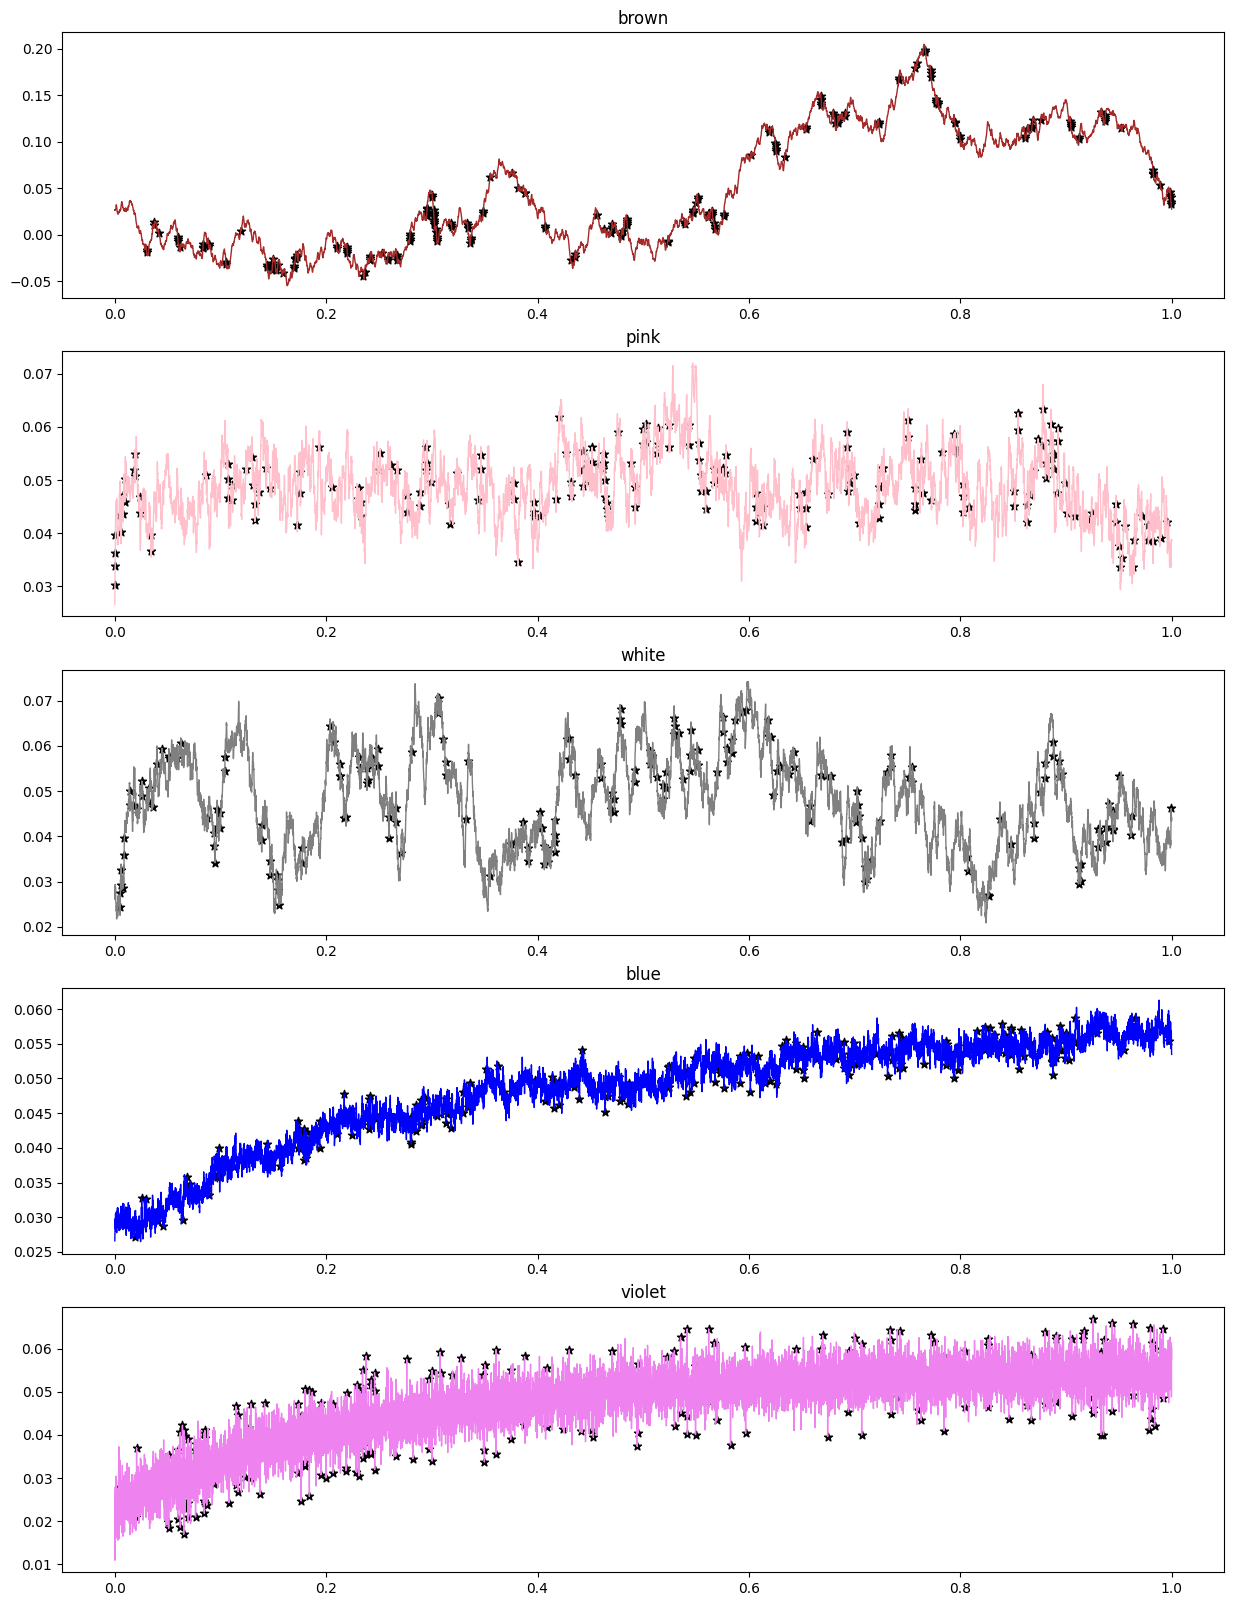

In [14]:
plot_anomaly_marked_series(vm_c_rate_diff_if)
plt.show()

# Save marked series

In [ ]:
# vm_rate_diff
# with open('vm_rate_diff.pickle', 'wb') as handle:
#    pickle.dump(vm_rate_diff, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# vm_sq_c_rate_diff_sum
# with open('vm_sq_c_rate_diff_sum.pickle', 'wb') as handle:
#    pickle.dump(vm_sq_c_rate_diff_sum, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
vm_c_rate_diff_if
with open('vm_c_rate_diff_if.pickle', 'wb') as handle:
    pickle.dump(vm_c_rate_diff_if, handle, protocol=pickle.HIGHEST_PROTOCOL)